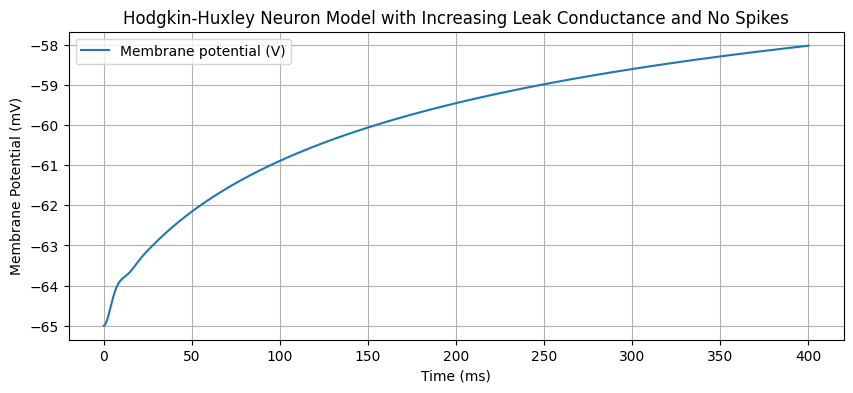

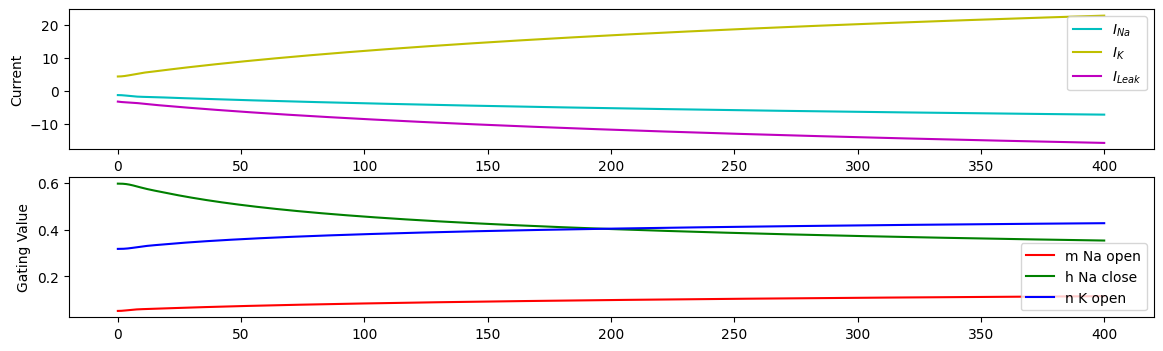

In [7]:
### This is a short code without complex functions or package, so I just use the same environment as DLC 
###############  increase Leak conductance ###########################
import numpy as np
import matplotlib.pyplot as plt

# Constants
C_m = 1.0  # membrane capacitance, in uF/cm^2
g_Na = 120.0  # maximum sodium conductance, in mS/cm^2 (set to 0 to avoid spikes)
g_K = 36.0  # maximum potassium conductance, in mS/cm^2
g_Leak_initial = 0.3  # initial leak conductance, in mS/cm^2
E_Na = 50.0  # sodium equilibrium potential, in mV
E_K = -77.0  # potassium equilibrium potential, in mV
E_Leak = -54.387  # leak equilibrium potential, in mV

# Time parameters
T = 400.0  # total time, in ms
dt = 0.01  # time step, in ms
time = np.arange(0, T + dt, dt)

# External current
I_ext = np.zeros_like(time)
# I_ext[1000:2000] = 2. 
# I_ext[3000:4000] = 3. 
# I_ext[5000:6000] = 3.  # applied current, in uA/cm^2
# I_ext[7000:8000] = 3.
# I_ext[8000:9000] = 3.
# I_ext[9000:10000] = 4

# I_ext[11000:12000] = 4.
# I_ext[13000:14000] = 4.
# I_ext[15000:16000] = 3.
# I_ext[17000:18000] = 3.
# I_ext[19000:20000] = 3.

# I_ext[21000:22000] = 3.
# I_ext[23000:24000] = 3.

# Functions for gating variables
def alpha_m(V): return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
def beta_m(V): return 4.0 * np.exp(-(V + 65) / 18)
def alpha_h(V): return 0.07 * np.exp(-(V + 65) / 20)
def beta_h(V): return 1.0 / (1 + np.exp(-(V + 35) / 10))
def alpha_n(V): return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
def beta_n(V): return 0.125 * np.exp(-(V + 65) / 80)

# Initialization
V = -65.0  # initial membrane potential, in mV
m = alpha_m(V) / (alpha_m(V) + beta_m(V))
h = alpha_h(V) / (alpha_h(V) + beta_h(V))
n = alpha_n(V) / (alpha_n(V) + beta_n(V))

I_Na_trace = []
I_K_trace = []
I_Leak_trace = []
V_trace = []  # to store the membrane potential over time
m_trace = []
h_trace = [] 
n_trace = [] 

# Simulation
g_Leak = g_Leak_initial  # initialize leak conductance
g_Leak_increment = 0.0001  # increment of leak conductance per time step, in mS/cm^2  0.000025

for t in time:
    # Ionic currents
    I_Na = g_Na * m**3 * h * (V - E_Na)
    I_K = g_K * n**4 * (V - E_K)
    I_Leak = g_Leak * (V - E_Leak)
    I_ion = I_Na + I_K + I_Leak
    I_Na_trace.append(I_Na)
    I_K_trace.append(I_K)
    I_Leak_trace.append(I_Leak)

    # Membrane potential update
    V += dt * (I_ext[int(t / dt)] - I_ion) / C_m
    V_trace.append(V)

    # Gating variables update (using Euler method)
    m += dt * (alpha_m(V) * (1 - m) - beta_m(V) * m)
    h += dt * (alpha_h(V) * (1 - h) - beta_h(V) * h)
    n += dt * (alpha_n(V) * (1 - n) - beta_n(V) * n)
    m_trace.append(m)
    h_trace.append(h)
    n_trace.append(n)
    
    # Increase leak conductance
    g_Leak += g_Leak_increment

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(time, V_trace, label='Membrane potential (V)')
plt.title('Hodgkin-Huxley Neuron Model with Increasing Leak Conductance and No Spikes')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
# plt.ylim(-70, -50)
plt.legend()
plt.grid()
plt.savefig('MP_changes.pdf', format='pdf')
plt.show()

plt.figure(figsize=(14, 4))
plt.subplot(2,1,1)
plt.plot(time, I_Na_trace, 'c', label='$I_{Na}$')
plt.plot(time, I_K_trace, 'y', label='$I_{K}$')
plt.plot(time, I_Leak_trace, 'm', label='$I_{Leak}$')
plt.ylabel('Current')
plt.legend()

plt.subplot(2,1,2)
plt.plot(time, m_trace, 'r', label='m Na open')
plt.plot(time, h_trace, 'g', label='h Na close')
plt.plot(time, n_trace, 'b', label='n K open')
plt.ylabel('Gating Value')
plt.legend()
